In [1]:
import jax
import jaxlib

print("jax version:", jax.__version__)
print("jaxlib version:", jaxlib.__version__)

import scvi
import h5py
import anndata as ad
import pandas as pd
import scipy.sparse as sp
import numpy as np

jax version: 0.4.35
jaxlib version: 0.4.35


/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

In [2]:
combined_adata = ad.read_h5ad('/home/sv2785/research_folder/ann_data/TMS_BRAINONLY_Combined_GE_ATSE.h5ad')
print(combined_adata.X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 92249252 stored elements and shape (19942, 77042)>
  Coords	Values
  (0, 1)	3.0
  (0, 31)	894.0
  (0, 33)	14.0
  (0, 41)	375.0
  (0, 47)	232.0
  (0, 53)	4.0
  (0, 62)	126.0
  (0, 81)	422.0
  (0, 83)	316.0
  (0, 123)	689.0
  (0, 253)	1.0
  (0, 373)	9.0
  (0, 584)	110.0
  (0, 589)	204.0
  (0, 607)	146.0
  (0, 620)	1.0
  (0, 647)	314.0
  (0, 704)	1.0
  (0, 708)	55.0
  (0, 723)	384.0
  (0, 758)	136.0
  (0, 761)	63.0
  (0, 765)	109.0
  (0, 804)	265.0
  (0, 815)	98.0
  :	:
  (19941, 76361)	-0.02289545657822932
  (19941, 76362)	-0.01758125984632416
  (19941, 76363)	0.1206251333044655
  (19941, 76364)	-0.014234563710877354
  (19941, 76365)	-0.20714516825665372
  (19941, 76628)	-0.23058531115119138
  (19941, 76629)	-0.10831592598971826
  (19941, 76630)	0.33890123714093257
  (19941, 76694)	-0.021787400161015828
  (19941, 76695)	0.02178740016101377
  (19941, 76784)	-0.011140687378338374
  (19941, 76785)	-0.3193632429020339
  (19941, 76

In [3]:
import torch

In [4]:
scvi.model.MULTIVISPLICE.setup_anndata(combined_adata, batch_key="modality", atse_counts='cell_by_cluster_matrix', junc_counts='cell_by_junction_matrix')

In [5]:

model = scvi.model.MULTIVISPLICE(
    combined_adata,
    n_genes=(combined_adata.var["modality"] == "Gene_Expression").sum(),
    n_junctions=(combined_adata.var["modality"] == "Splicing").sum(),
)

model.view_anndata_setup()

/opt/conda/envs/scvi-env/lib/python3.12/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Anndata setup with scvi-tools version 1.2.0.

Setup via `MULTIVISPLICE.setup_anndata` with arguments:

{
│   'layer': None,
│   'atse_counts': 'cell_by_cluster_matrix',
│   'junc_counts': 'cell_by_junction_matrix',
│   'batch_key': 'modality',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None,
│   'protein_expression_obsm_key': None,
│   'protein_names_uns_key': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│    n_atse_counts_key     │ 77042 │
│         n_batch          │   1   │
│         n_cells          │ 19942 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│    n_junc_counts_key     │ 77042 │
│         n_labels         │   1   │
│          n_vars          │ 77042 │
└──────────────────────────┴───────┘

                        Data Registry                        
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Registry Key   ┃           scvi-tools Location           ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        X        │                 adata.X                 │
│ atse_counts_key │ adata.layers['cell_by_cluster_matrix']  │
│      batch      │        adata.obs['_scvi_batch']         │
│      ind_x      │          adata.obs['_indices']          │
│ junc_counts_key │ adata.layers['cell_by_junction_matrix'] │
│     labels      │        adata.obs['_scvi_labels']        │
└─────────────────┴─────────────────────────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │   paired   │          0          │
└───────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │   paired   │          0          │
└───────────────────────┴────────────┴─────────────────────┘

In [6]:
model.train()

/var/tmp/ipykernel_20807/1676823408.py:1: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train()
/home/sv2785/research_folder/scvi-tools-splicing/src/scvi/model/_multivi_splice.py:343: UserWarning: Disabling adversarial classifier.
  training_plan = self._training_plan_cls(self.module, **plan_kwargs)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/lightning/py

Training:   0%|          | 0/500 [00:00<?, ?it/s]

Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 16985.535. Signaling Trainer to stop.


In [7]:
model.save("/home/sv2785/research_folder/ann_data/", overwrite=True)

In [9]:
model = scvi.model.MULTIVISPLICE.load("/home/sv2785/research_folder/ann_data/", adata=combined_adata)

INFO     File /home/sv2785/research_folder/ann_data/model.pt already downloaded                                    


/home/sv2785/research_folder/scvi-tools-splicing/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_locat

In [11]:
import scanpy as sc
MULTIVI_LATENT_KEY = "X_multivi"

combined_adata.obsm[MULTIVI_LATENT_KEY] = model.get_latent_representation()

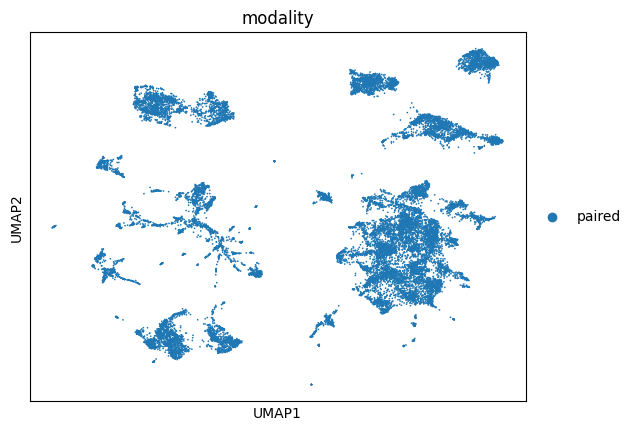

In [12]:
sc.pp.neighbors(combined_adata, use_rep=MULTIVI_LATENT_KEY)
sc.tl.umap(combined_adata, min_dist=0.2)
sc.pl.umap(combined_adata, color="modality")

In [14]:
combined_adata.obs

,batch_id,modality,_indices,_scvi_batch,_scvi_labels
cell_id_for_index,,,,,
A1_B000826,1,paired,0,0,0
A1_B001176,1,paired,1,0,0
A1_B003279,1,paired,2,0,0
A1_B003281,1,paired,3,0,0
A1_B003290,1,paired,4,0,0
...,...,...,...,...,...
P9_B003921,1,paired,19937,0,0
P9_D045315,1,paired,19938,0,0
P9_D045318,1,paired,19939,0,0


AnnData object with n_obs × n_vars = 19942 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'cell_clean', 'cell_id', 'batch', 'old_cell_id_index', 'cell_id_index', 'subtissue_clean', 'cell_type_grouped', 'leiden'
    var: 'n_cells', 'mouse_gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'


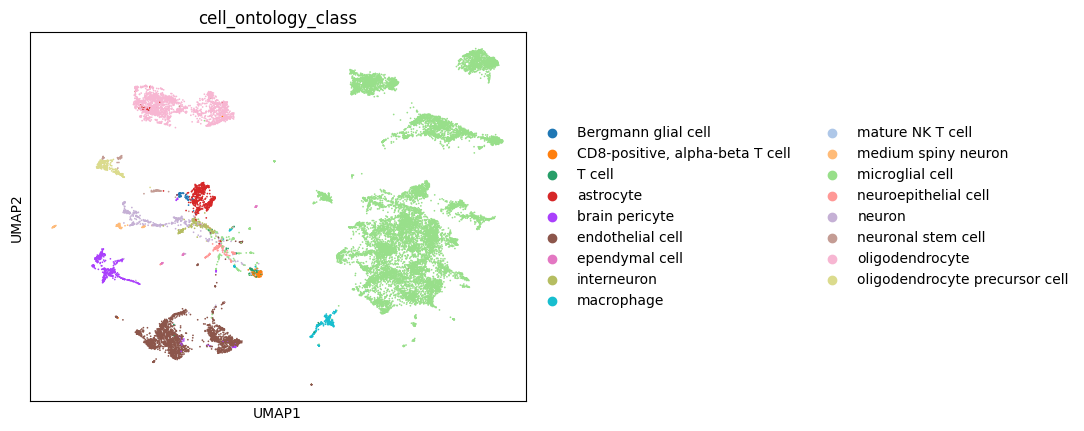

In [19]:
reference_adata = sc.read("/home/sv2785/research_folder/ann_data/GE_Anndata_Object_BRAIN_only_20241105.h5ad")
print(reference_adata)
cell_id_to_cell_type = dict(zip(reference_adata.obs.index, reference_adata.obs["cell_ontology_class"]))
combined_adata.obs["cell_ontology_class"] = combined_adata.obs.index.map(cell_id_to_cell_type)
sc.pl.umap(combined_adata, color="cell_ontology_class")

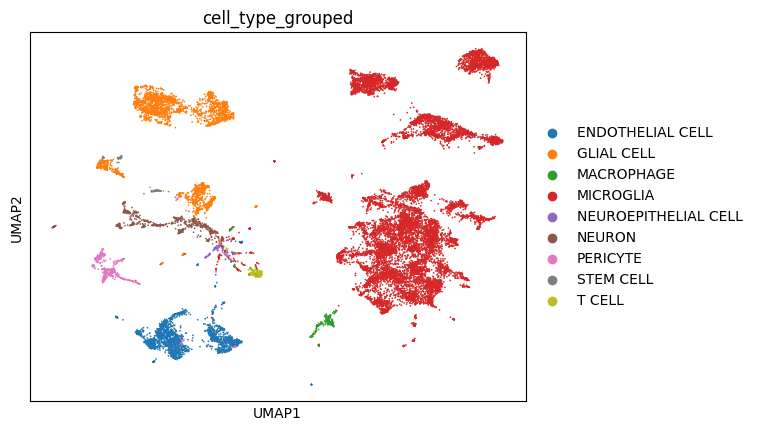

In [20]:
sc.pl.umap(combined_adata, color="cell_type_grouped")